In [410]:
import sys
sys.path.append("../python")

from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations
import json

In [411]:
parameters_path = "../configs/mh_with_orientation.json"
    
file = open(parameters_path)
config = json.load(file)
file.close()

In [412]:
# Set center
center = (config["Geometry"]["Center"]["x"], config["Geometry"]["Center"]["y"])

# Set type
dipole_type = config["ModelConfig"]["Dipole"]["Type"]

# Set dipole
position = (config["ModelConfig"]["Dipole"]["Position"]["x"],config["ModelConfig"]["Dipole"]["Position"]["y"])

sample_path = config["Setup"]["OutputPath"] + config["Sampling"]["ResultFile"] + ".h5"
fin = h5py.File(sample_path)
samples = np.array( fin['/samples'] )
fin.close()

n = len(samples[0])

if dipole_type == 'Radial':
    s_ref = utility_functions.get_radial_dipole(position,center)
    sample_dict = {
        "x": samples[0],
        "y": samples[1]
    }
else:
    rho = config["ModelConfig"]["Dipole"]["Orientation"]["rho"]
    s_ref = utility_functions.get_dipole(position,center,rho)
    sample_dict = {
        "x": samples[0],
        "y": samples[1],
        "rho": samples[2]
    }

sample_dataset = az.dict_to_dataset(sample_dict)

sample_dict_1 = {
        "x": samples[0][0:5000],
        "y": samples[1][0:5000]
}
sample_dataset_1 = az.dict_to_dataset(sample_dict_1)

In [413]:
print("Effective sample size: " + str(az.ess(samples[0])))
print("Autocorrelation time: " + str(n/az.ess(samples[0])))
print("MCSE: " + str(az.mcse(samples)))

Effective sample size: 430.5879224571031
Autocorrelation time: 13.934436353350677
MCSE: [22.74885001]


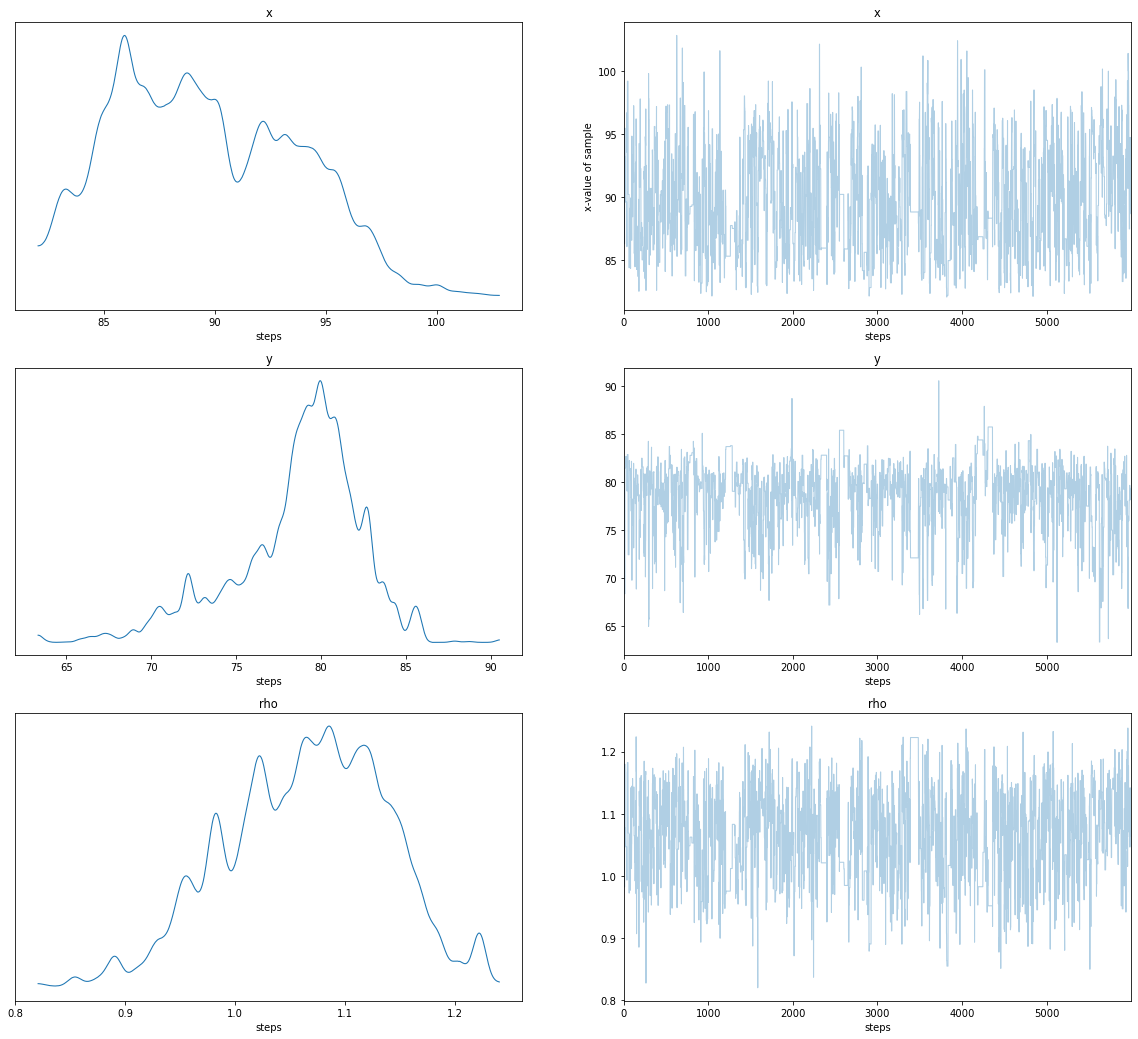

In [414]:
fig, axes = plt.subplots(3, 2, figsize=(20,18))

for ax in axes.flatten():
    ax.set_xlabel('steps')

axes[0,1].set_ylabel('x-value of sample')
#axes[0,1].set_ylim(60,130)

p = az.plot_trace(sample_dataset, axes=axes)



In [415]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

p = az.plot_autocorr(sample_dataset, ax = axes, max_lag=100, combined=True, figsize=(20,4))

axes[1].set_ylabel('autocorrelation')
axes[1].set_xlabel('lag')


Text(0.5, 0, 'lag')

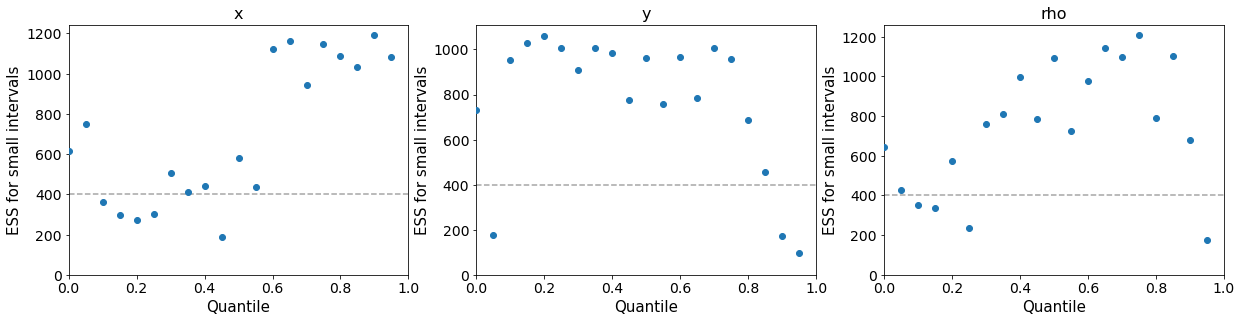

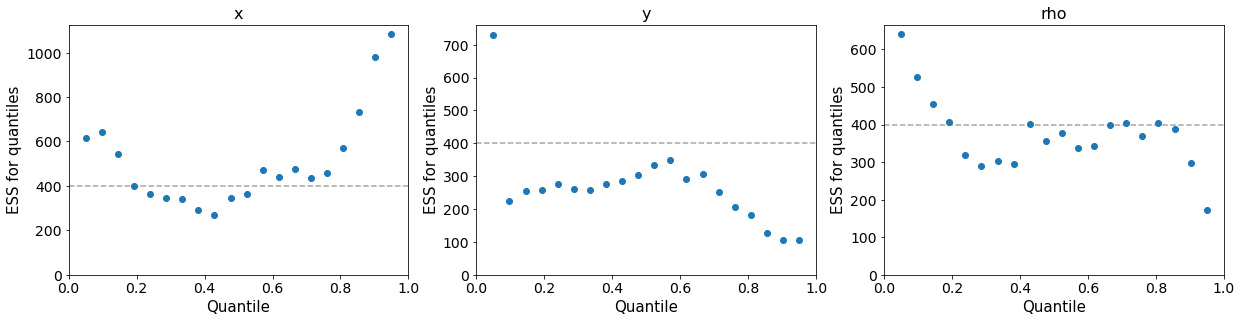

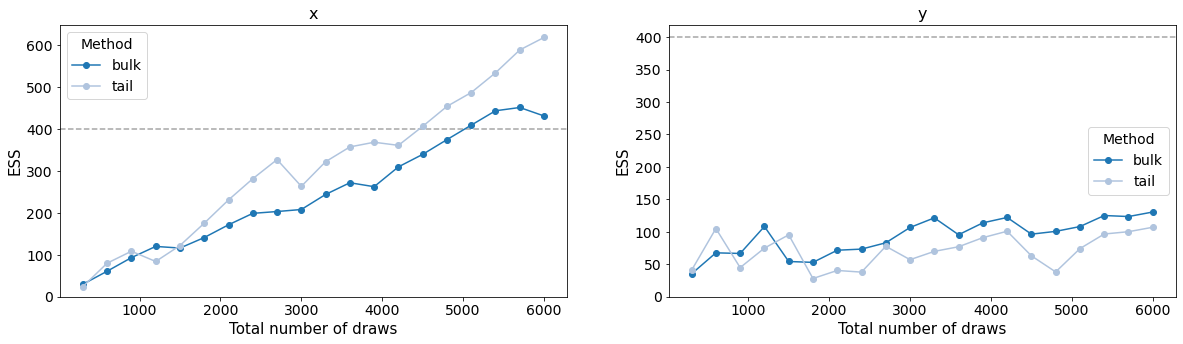

In [ ]:
p = az.plot_ess(sample_dataset, kind='local')
p = az.plot_ess(sample_dataset, kind='quantile')

fig, axes = plt.subplots(1, 2, figsize=(20,5))
p = az.plot_ess(sample_dataset, kind='evolution', ax=axes, extra_kwargs={"color": "lightsteelblue"})
#p = az.plot_ess(sample_dataset_1, kind='evolution', ax=axes, extra_kwargs={"color": "lightsteelblue"})
